In [ ]:
import pandas as pd, os, numpy as np, random
import seaborn as sns     
import matplotlib.pyplot as plt
sns.set()
import geopandas as geopd
from shapely import wkt

# Taxi_dataset


In [ ]:
to_keep_by = 100

## Explore the yellow taxi trip dataset


### Read the dataset

In [ ]:
## Read dataset

dataset_path = '../capstone/Project-baseline/Data/yellow_tripdata_2020-01.csv'

csv_data = pd.read_csv(dataset_path)

/var/folders/vm/01c_nbj93wj1_93nt97yz55h0000gn/T/ipykernel_19113/526928966.py:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  csv_data = pd.read_csv(dataset_path)


### Extract useful informations

In [ ]:
## Check data length and columns
print(f'columns are{list(csv_data.columns)},\n and number of data is :{csv_data.shape}')

columns are['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge'],
 and number of data is :(6405008, 18)


In [ ]:
## Check variable type
csv_data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,6.339567e+06,6.339567e+06,6.405008e+06,6.339567e+06,6.405008e+06,6.405008e+06,6.339567e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06
mean,1.669624e+00,1.515333e+00,2.929644e+00,1.059908e+00,1.647323e+02,1.626627e+02,1.270298e+00,1.269411e+01,1.115456e+00,4.923182e-01,2.189342e+00,3.488395e-01,2.979870e-01,1.866315e+01,2.275662e+00
std,4.703484e-01,1.151594e+00,8.315911e+01,8.118432e-01,6.554374e+01,6.991261e+01,4.739985e-01,1.212730e+01,1.260054e+00,7.374184e-02,2.760028e+00,1.766978e+00,3.385937e-02,1.475736e+01,7.352646e-01
min,1.000000e+00,0.000000e+00,-3.062000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.238000e+03,-2.700000e+01,-5.000000e-01,-9.100000e+01,-3.574000e+01,-3.000000e-01,-1.242300e+03,-2.500000e+00
25%,1.000000e+00,1.000000e+00,9.600000e-01,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.116000e+01,2.500000e+00
50%,2.000000e+00,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.950000e+00,0.000000e+00,3.000000e-01,1.430000e+01,2.500000e+00
75%,2.000000e+00,2.000000e+00,2.930000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,2.860000e+00,0.000000e+00,3.000000e-01,1.980000e+01,2.500000e+00
max,2.000000e+00,9.000000e+00,2.102401e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.265000e+03,1.130100e+02,3.080000e+01,1.100000e+03,9.105000e+02,3.000000e-01,4.268300e+03,2.750000e+00


In [ ]:
## Check existance NAN in the dataframe
csv_data.isnull().sum();

## Drop rows that have the same pick_up and drop_off location
csv_data = csv_data[csv_data.PULocationID!=csv_data.DOLocationID]

In [ ]:
csv_data.nunique();

## Preprocess data

In [ ]:
all_data = csv_data.copy().dropna()
print(f'number of data left is :{all_data.shape} from the {csv_data.shape} that we had initally')

number of data left is :(5945426, 18) from the (6008443, 18) that we had initally


In [ ]:
del csv_data

In [ ]:
all_data['tpep_pickup_datetime'] =  pd.to_datetime(all_data['tpep_pickup_datetime']) 
all_data['tpep_dropoff_datetime'] =  pd.to_datetime(all_data['tpep_dropoff_datetime']) 
all_data['PUday'] = all_data['tpep_pickup_datetime'].dt.day
all_data['PUhour'] = all_data['tpep_pickup_datetime'].dt.time
all_data['DOday'] = all_data['tpep_dropoff_datetime'].dt.day
all_data['DOhour'] = all_data['tpep_dropoff_datetime'].dt.time

### Create demand dataframe

In [ ]:
## demand lists

PU_demand_month = all_data.groupby('PULocationID').count()['VendorID']
PU_demand_month = PU_demand_month.reset_index().rename(columns={'VendorID':'PU_Demand_month'})


DO_demand_month = all_data.groupby('DOLocationID').count()['VendorID']
DO_demand_month = DO_demand_month.reset_index().rename(columns={'VendorID':'DO_Demand_month'})


### Pick data for a single day of choice

In [ ]:
data = all_data[all_data.PUday==1]

del all_data

In [ ]:
# data_day1.passenger_count.value_counts()
# sns.countplot(x='passenger_count',data=data);

In [ ]:
## Innitiate the dataset that we are going to work with later
new_attributes = {'trip_distance':['count']}

# new_attributes = {'trip_distance':['count','min','max','mean'],'total_amount':['min','max','mean'],'tolls_amount':['mean']}

new_columns = ['_'.join([key,elem]) for key,attrib in new_attributes.items() for elem in attrib]
new_data = data.groupby(['PULocationID','DOLocationID']).agg(new_attributes)
new_data.columns = new_columns

### Create demand dataframe for a day

In [ ]:
## demand lists
PU_demand_day = data.groupby('PULocationID').count()['VendorID']
PU_demand_day = PU_demand_day.reset_index().rename(columns={'VendorID':'PU_Demand_day'})


DO_demand_day = data.groupby('DOLocationID').count()['VendorID']
DO_demand_day = DO_demand_day.reset_index().rename(columns={'VendorID':'DO_Demand_day'})


### Reduce dataset size(moved elsewhere)

In [ ]:
# new_data = new_data.reset_index()
# range_to_keep = random.sample(range(0, 263), nb_data_to_keep)


In [ ]:

# new_data = new_data.loc[new_data.apply(lambda x: x.PULocationID in range_to_keep and x.DOLocationID in range_to_keep and x.PULocationID!=x.DOLocationID, axis=1)]

# new_data=new_data.rename(columns={'trip_distance_count':'Demand'})
# new_data.sort_values(by='Demand',ascending=False);

In [ ]:
# new_data;

In [ ]:
# ## Visualisation preparations

# PU_demand_target = new_data.groupby('PULocationID').sum().drop(columns='DOLocationID').rename(columns={'Demand':'PU_Demand_target'})
# DO_demand_target = new_data.groupby('DOLocationID').sum().drop(columns='PULocationID').rename(columns={'Demand':'DO_Demand_target'})

In [ ]:
# del data

## Explore NYC zones

### Read the NYC zone file

In [ ]:
zone_path = '../capstone/Project-baseline/Data/nyc-taxi-zones-1.csv'

zone_data = pd.read_csv(zone_path)
zone_data

,OBJECTID,Shape_Leng,the_geom,Shape_Area,zone,LocationID,borough
0,1,0.116357,MULTIPOLYGON (((-74.18445299999996 40.69499599...,0.000782,Newark Airport,1,EWR
1,2,0.433470,MULTIPOLYGON (((-73.82337597260663 40.63898704...,0.004866,Jamaica Bay,2,Queens
2,3,0.084341,MULTIPOLYGON (((-73.84792614099985 40.87134223...,0.000314,Allerton/Pelham Gardens,3,Bronx
3,4,0.043567,MULTIPOLYGON (((-73.97177410965318 40.72582128...,0.000112,Alphabet City,4,Manhattan
4,5,0.092146,MULTIPOLYGON (((-74.17421738099989 40.56256808...,0.000498,Arden Heights,5,Staten Island
...,...,...,...,...,...,...,...
258,256,0.067915,MULTIPOLYGON (((-73.95834207500002 40.71330630...,0.000169,Williamsburg (South Side),256,Brooklyn
259,259,0.126750,MULTIPOLYGON (((-73.85107116191898 40.91037152...,0.000395,Woodlawn/Wakefield,259,Bronx
260,260,0.133514,MULTIPOLYGON (((-73.90175373399988 40.76077547...,0.000422,Woodside,260,Queens
261,261,0.027120,MULTIPOLYGON (((-74.01332610899988 40.70503078...,0.000034,World Trade Center,261,Manhattan


### Preprocess NYC zone dataset

In [ ]:
geo_data = geopd.GeoDataFrame(zone_data)#, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))
geo_data['geometry'] = geo_data['the_geom'].apply(wkt.loads)
del zone_data

In [ ]:
geo_data["x"] = geo_data.centroid.x
geo_data["y"] = geo_data.centroid.y
geo_data["centroid"] = geo_data.centroid

<AxesSubplot:>

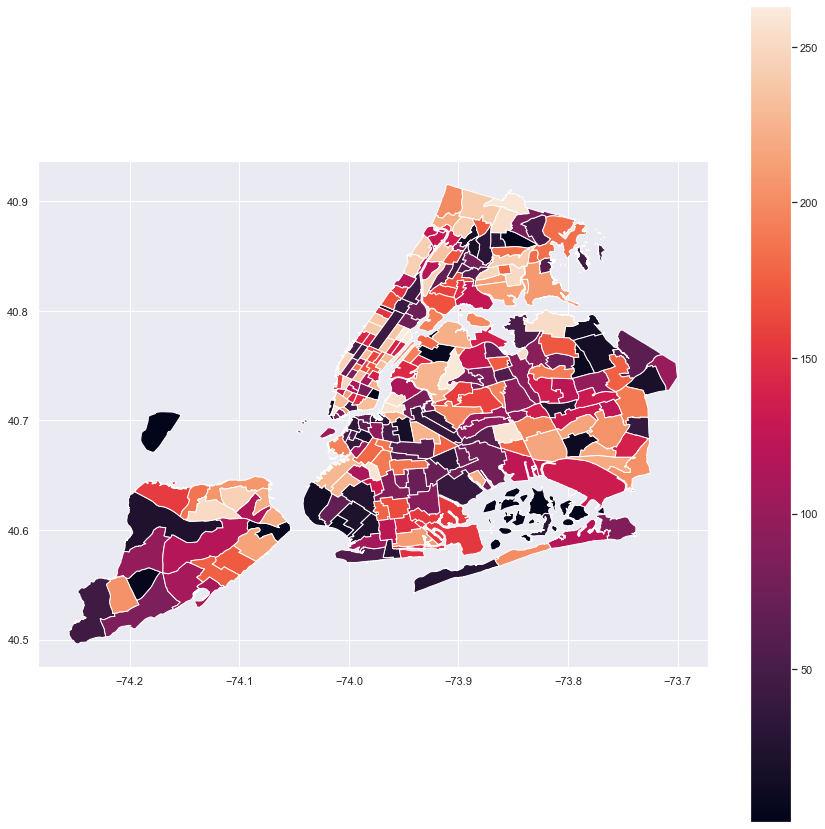

In [ ]:
geo_data.plot(column='borough',figsize=(15,15), legend=True)

### Reduce dataset size

#### Reduce randomly

In [ ]:
new_data = new_data.reset_index()
ids_to_keep = random.sample(range(0, 263), to_keep_by)

#### Reduce by keeping only a region:

In [ ]:
# to_keep_by = 'Manhattan'

# ids_to_keep = geo_data[geo_data.borough==to_keep_by].LocationID.values

In [ ]:
#### Create the new reduced dataset

In [ ]:

new_data = new_data.loc[new_data.apply(lambda x: x.PULocationID in ids_to_keep and x.DOLocationID in ids_to_keep and x.PULocationID!=x.DOLocationID, axis=1)]

new_data=new_data.rename(columns={'trip_distance_count':'Demand'})
new_data.sort_values(by='Demand',ascending=False);

In [ ]:
new_data;

In [ ]:
## Visualisation preparations

PU_demand_target = new_data.groupby('PULocationID').sum().drop(columns='DOLocationID').rename(columns={'Demand':'PU_Demand_target'})
DO_demand_target = new_data.groupby('DOLocationID').sum().drop(columns='PULocationID').rename(columns={'Demand':'DO_Demand_target'})

In [ ]:
del data

### Add PU & DO demands to the data

In [ ]:
PU_demand_target

In [ ]:
## Add demand to zone dataset 
geo_data = geo_data.join(PU_demand_month.set_index('PULocationID'),on='LocationID')

geo_data = geo_data.join(DO_demand_month.set_index('DOLocationID'),on='LocationID')


geo_data = geo_data.join(PU_demand_day.set_index('PULocationID'),on='LocationID')

geo_data = geo_data.join(DO_demand_day.set_index('DOLocationID'),on='LocationID')


geo_data = geo_data.join(PU_demand_target,on='LocationID')

geo_data = geo_data.join(DO_demand_target,on='LocationID')


# del PU_demand_month,DO_demand_month,PU_demand_day,DO_demand_day,PU_demand_target,DO_demand_target

In [ ]:
print(f'columns are{list(geo_data.columns)},\n and number of data is :{geo_data.shape}')

### Visualize the data

#### Visualize monthly demand

In [ ]:
geo_data

In [ ]:
geo_data['PU_log_Demand_month'] = np.log(geo_data.PU_Demand_month)
geo_data['DO_log_Demand_month'] = np.log(geo_data.DO_Demand_month)

fig, ax = plt.subplots(1, 2,figsize=(15,10))

# geo_data.plot(column='borough', ax=ax, legend=True)
# fig, ax = plt.subplots(1, 1,figsize=(10,10))

geo_data.plot(column='PU_log_Demand_month', ax=ax[0], legend=True,
              legend_kwds={'label': "log of total number of client",'orientation': "horizontal"})
ax[0].set_title('Pick_up locations for a month')

geo_data.plot(column='DO_log_Demand_month', ax=ax[1], legend=True,
              legend_kwds={'label': "log of total number of client",'orientation': "horizontal"})
ax[1].set_title('Drop_off locations for a month')

fig.savefig('./Data/plots/PU_demand_january.png')

#### Visualize daily demand

In [ ]:
geo_data['PU_log_Demand_day'] = np.log(geo_data.PU_Demand_day)
geo_data['DO_log_Demand_day'] = np.log(geo_data.DO_Demand_day)

fig, ax = plt.subplots(1, 2,figsize=(15,10))

# geo_data.plot(column='borough', ax=ax, legend=True)
# fig, ax = plt.subplots(1, 1,figsize=(10,10))

geo_data.plot(column='PU_log_Demand_day', ax=ax[0], legend=True,
              legend_kwds={'label': "log of total number of client",'orientation': "horizontal"})
ax[0].set_title('Pick_up locations for one day')

geo_data.plot(column='DO_log_Demand_day', ax=ax[1], legend=True,
              legend_kwds={'label': "log of total number of client",'orientation': "horizontal"})
ax[1].set_title('Drop_off locations for one day')

fig.savefig('./Data/plots/PU_demand_day1.png')

#### Visualize selected data demand

In [ ]:
geo_data['PU_log_Demand_target'] = np.log(geo_data.PU_Demand_target)
geo_data['DO_log_Demand_target'] = np.log(geo_data.DO_Demand_target)

fig, ax = plt.subplots(1, 2,figsize=(15,10))

# geo_data.plot(column='borough', ax=ax, legend=True)
# fig, ax = plt.subplots(1, 1,figsize=(10,10))
geo_data.plot(ax=ax[0],color='black')
geo_data.plot(ax=ax[1],color='black')
geo_data.plot(column='PU_log_Demand_target', ax=ax[0], legend=True,
              legend_kwds={'label': "log of total number of client",'orientation': "horizontal"})
ax[0].set_title('Pick_up locations for picked data')

geo_data.plot(column='DO_log_Demand_target', ax=ax[1], legend=True,
              legend_kwds={'label': "log of total number of client",'orientation': "horizontal"})
ax[1].set_title('Drop_off locations for picked data')
fig.savefig('./Data/plots/PU_demand_selected_data.png')

## Create demand dataset for the OpenAI gym model

In [ ]:
location_data = pd.DataFrame(geo_data[['zone','LocationID','geometry','borough','centroid','x','y']])
location_data.LocationID = location_data.LocationID.astype(int)
location_data.dtypes

In [ ]:
location_data

In [ ]:
# len(np.unique(new_data.PULocationID)), len(np.unique(new_data.DOLocationID))

In [ ]:
new_data = new_data.merge(location_data.add_prefix('PU_'),left_on='PULocationID',right_on='PU_LocationID')#,how='cross')

new_data = new_data.merge(location_data.add_prefix('DO_'),left_on='DOLocationID',right_on='DO_LocationID')#,how='cross')

del location_data
new_data['distance']=geopd.GeoSeries(new_data.PU_centroid).distance(geopd.GeoSeries(new_data.DO_centroid))

In [ ]:
# Save data:
# new_data.to_csv('./Data/demand_extended.csv')

new_data.to_csv(f'./Data/demand_{to_keep_by}.csv')



In [ ]:
location_data = pd.DataFrame(geo_data[['LocationID','borough','centroid']])
location_data.LocationID = location_data.LocationID.astype(int)
location_data.dtypes

In [ ]:
list_data =[]
for i in geo_data.LocationID.values:
    for j in geo_data.LocationID.values:
        list_data.append([i,j])
        #,geo_data[geo_data.LocationID==i]['centroid'],geo_data[geo_data.LocationID==j]['centroid']])
data_distance  = pd.DataFrame(list_data, columns=['PULocationID','DOLocationID'])

In [ ]:
data_distance = data_distance.merge(location_data.add_prefix('PU_'),left_on='PULocationID',right_on='PU_LocationID')#,how='cross')
data_distance = data_distance.merge(location_data.add_prefix('DO_'),left_on='DOLocationID',right_on='DO_LocationID')#,how='cross')

del location_data
data_distance['distance']=geopd.GeoSeries(data_distance.PU_centroid).distance(geopd.GeoSeries(data_distance.DO_centroid))

In [ ]:
data_distance=data_distance[(data_distance.DOLocationID.isin(ids_to_keep)) & (data_distance.PULocationID.isin(ids_to_keep))]

In [ ]:
data_distance.to_csv(f'./Data/distance_info_{to_keep_by}.csv')


## Network Visualisation of the dataset

In [ ]:
import dash_core_components as dcc
import dash_html_components as html
import dash_cytoscape as cyto
from dash.dependencies import Input, Output

from jupyter_dash import JupyterDash
import plotly.express as px

In [ ]:
# # ## When Checking the taxi_zone_lookup LocationID are unknown so for the sake of practicality I'm ommiting them
# new_csv = new_data[new_data["PULocationID"] != 265]
# new_csv = new_csv[new_csv["PULocationID"] != 264]
# new_csv = new_csv[new_csv["DOLocationID"] != 264]
# new_csv = new_csv[new_csv["DOLocationID"] != 265]
# len(new_csv)

In [ ]:
df = new_data.reset_index()


df = df[(df.PULocationID != 265) & (df.DOLocationID != 265) & 
        (df.PULocationID != 264)& (df.DOLocationID != 264)& 
        (df.PULocationID != 263)& (df.DOLocationID != 263)]
source ,target='PULocationID', 'DOLocationID'

zone_dict = geo_data.set_index('OBJECTID')

source_list,target_list = df[source].astype(str).tolist(),df[target].astype(str).tolist()

nodes = np.unique(source_list+target_list)
edges = [(source_list[index],target_list[index]) for index in range(len(source_list))]

# return_dict=[{'data':{'id':node ,'label':zone_dict.loc[node]['zone'] ,'parent':zone_dict.loc[node]['borough']},
#                       'position': {'x':zone_dict.loc[node]['x']*2000, 
#                                    'y':zone_dict.loc[node]['y']*2000 }}
#              for node in nodes]

# parent_nodes=[{
#                 'data': {'id':borough, 'label': borough}
#             } for borough in zone_data['borough'].unique().tolist()]
# for edge in edges:
#         return_dict.append({'data': {'source': edge[0], 'target': edge[1]}})

In [ ]:
app = JupyterDash(__name__)


app.layout = html.Div([
    cyto.Cytoscape(
        id='cytoscape-compound',
        layout={'name': 'preset'},
        style={'width': '1000px', 'height': '1000px'},
        stylesheet=[
            {
                'selector': 'node',
                'style': {'content': 'data(label)'}
            },
            {
                'selector': '.countries',
                'style': {'width': 5}
            },
            {
                'selector': '.cities',
                'style': {'line-style': 'dashed'}
            }
        ],
        elements=return_dict)])

app.run_server(mode='inline');